In [2]:
import numpy as np 
import pandas as pd

In [3]:
stock_prices = pd.read_csv("stock_prices.csv")

stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])

stock_prices = stock_prices[['Date','SecuritiesCode','Open','High','Low','Close','Volume', 'Target']]
stock_prices

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,0.012324
2,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,0.006154
3,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,0.011053
4,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,0.003026
...,...,...,...,...,...,...,...,...
2332526,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,0.034816
2332527,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,0.025478
2332528,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,-0.004302
2332529,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,0.009098


In [4]:
stock_li=  pd.read_csv("stock_list.csv")
stock_li = stock_li[['SecuritiesCode', 'Name']]
stock_li

,SecuritiesCode,Name
0,1301,"KYOKUYO CO.,LTD."
1,1305,Daiwa ETF-TOPIX
2,1306,NEXT FUNDS TOPIX Exchange Traded Fund
3,1308,Nikko Exchange Traded Index Fund TOPIX
4,1309,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...
...,...,...
4412,9994,YAMAYA CORPORATION
4413,9995,"GLOSEL Co.,Ltd."
4414,9996,"Satoh&Co.,Ltd."
4415,9997,"BELLUNA CO.,LTD."


In [5]:
stocks = pd.merge(stock_prices, stock_li, on='SecuritiesCode')
stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD."
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD."
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD."
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD."
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD."
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.


<ipython-input-6-b2a446d023ae>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stocks.corr()


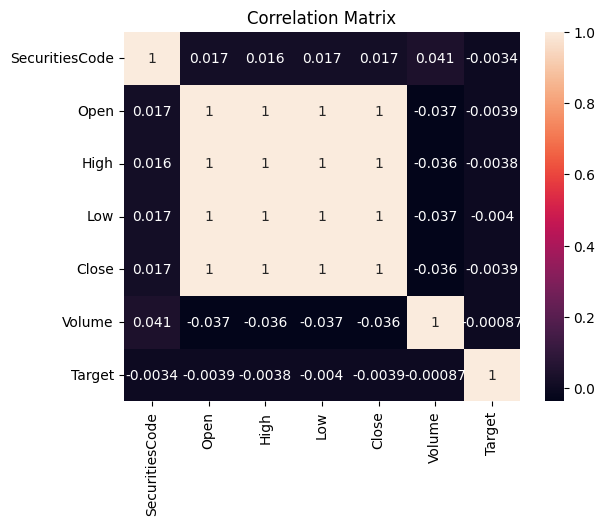

In [6]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = stocks.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [7]:
stocks.isna().sum()

Date                 0
SecuritiesCode       0
Open              7608
High              7608
Low               7608
Close             7608
Volume               0
Target             238
Name                 0
dtype: int64

In [8]:
# # stocks = stocks.fillna(stocks.mean(skipna=True))

# for col in stocks.columns:
#     stocks[col] = stocks[col].fillna(stocks[col].mean(skipna=True))

# # Show the resulting dataframe
# print(stocks)

In [9]:

stocks.dropna(inplace=True)


In [10]:

stock_prices.dropna(inplace=True)


In [11]:
stocks.isnull().sum()

Date              0
SecuritiesCode    0
Open              0
High              0
Low               0
Close             0
Volume            0
Target            0
Name              0
dtype: int64

In [12]:
stocks.duplicated().sum()

0

In [13]:
stocks.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,Target
count,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06
mean,5.895573e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.942008e+05,4.262053e-04
std,2.403239e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.917450e+06,2.339197e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,1.000000e+02,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.070000e+04,-1.052632e-02
50%,6.240000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.079000e+05,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.041000e+05,1.052632e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,6.182380e-01


In [14]:
stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD."
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD."
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD."
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD."
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD."
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.


In [15]:
Y=stocks['Close']
X=stocks[['High','Low','Open', 'Volume']]

In [16]:
X.isnull().sum()

High      0
Low       0
Open      0
Volume    0
dtype: int64

In [17]:
X

,High,Low,Open,Volume
0,2755.0,2730.0,2734.0,31400
1,2747.0,2735.0,2743.0,17900
2,2744.0,2720.0,2734.0,19900
3,2754.0,2735.0,2745.0,24200
4,2752.0,2737.0,2748.0,9300
...,...,...,...,...
2332526,7350.0,6970.0,6970.0,772500
2332527,7240.0,6410.0,6770.0,887400
2332528,7380.0,6670.0,7190.0,496800
2332529,7870.0,7110.0,7160.0,783000


In [18]:
Y

0          2742.0
1          2738.0
2          2740.0
3          2748.0
4          2745.0
            ...  
2332526    6970.0
2332527    7020.0
2332528    7090.0
2332529    7520.0
2332530    7220.0
Name: Close, Length: 2324923, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
Scale = MinMaxScaler()
xScaled = Scale.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [21]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1627446, 4) (1627446,) (697477, 4) (697477,)


In [22]:
X_train 

,High,Low,Open,Volume
589737,708.0,683.0,701.0,277400
1380755,1593.0,1550.0,1582.0,20000
831216,334.0,324.0,325.0,37700
1094557,3945.0,3855.0,3860.0,70200
1445736,357.0,348.0,357.0,2699600
...,...,...,...,...
1366759,5720.0,5630.0,5700.0,49200
1078556,1024.0,987.0,1007.0,794000
1998366,3980.0,3940.0,3980.0,194300
268147,5150.0,5030.0,5030.0,49000


In [23]:
Y_train

589737      686.0
1380755    1558.0
831216      331.0
1094557    3885.0
1445736     355.0
            ...  
1366759    5640.0
1078556    1015.0
1998366    3975.0
268147     5140.0
1419879    2558.0
Name: Close, Length: 1627446, dtype: float64

In [24]:
X_test

,High,Low,Open,Volume
345520,1722.0,1691.0,1720.0,182600
479116,2088.0,2058.0,2075.0,44900
1951563,2205.0,2159.0,2191.0,86500
1061080,1104.0,1071.0,1098.0,363000
633395,1420.0,1370.0,1420.0,48400
...,...,...,...,...
1587546,943.0,929.0,940.0,26800
1264827,1885.0,1788.0,1798.0,666100
1840696,628.0,594.0,624.0,30235100
151980,1955.0,1902.0,1933.0,1048600


In [25]:
Y_test

345520     1705.0
479116     2073.0
1951563    2171.0
1061080    1082.0
633395     1418.0
            ...  
1587546     943.0
1264827    1883.0
1840696     607.0
151980     1925.0
2079415    2866.0
Name: Close, Length: 697477, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression estimator
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 1217.5216548967571
R-squared: 0.9999046692689092


In [27]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from sklearn import metrics
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout,Flatten

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=model.fit(X_train,Y_train,epochs=5,batch_size=32)

Epoch 1/5
50858/50858 [==============================] - 706s 14ms/step - loss: 14999766.0000 - categorical_accuracy: 1.0000
Epoch 2/5
50858/50858 [==============================] - 697s 14ms/step - loss: 10486067.0000 - categorical_accuracy: 1.0000
Epoch 3/5
50858/50858 [==============================] - 682s 13ms/step - loss: 8752205.0000 - categorical_accuracy: 1.0000
Epoch 4/5
50858/50858 [==============================] - 682s 13ms/step - loss: 8912882.0000 - categorical_accuracy: 1.0000
Epoch 5/5
50858/50858 [==============================] - 682s 13ms/step - loss: 8565365.0000 - categorical_accuracy: 1.0000


In [28]:
train_predict2=model.predict(X_train)
test_predict2=model.predict(X_test)
train_predict2.shape, test_predict2.shape

21797/21797 [==============================] - 96s 4ms/step


((1627446, 1), (697477, 1))

In [29]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
print("Test data RMSE: ", math.sqrt(mean_squared_error(Y_test,test_predict2)))
print("Test data MSE: ", mean_squared_error(Y_test,test_predict2))
print("Test data MAE: ", mean_absolute_error(Y_test,test_predict2))

Test data RMSE:  2686.8060170688186
Test data MSE:  7218926.573357208
Test data MAE:  655.7242287236396


In [30]:
l_pred=model.predict(X_test)
l_pred=l_pred.flatten()

21797/21797 [==============================] - 95s 4ms/step


In [32]:
df3 = pd.DataFrame({'Actual': Y_test, 'Predicted': l_pred})
df4=df3.reset_index(drop=True, inplace=True)


df3

,Actual,Predicted
0,1705.0,1429.811646
1,2073.0,1679.201904
2,2171.0,1718.343384
3,1082.0,1019.834473
4,1418.0,1257.832764
...,...,...
697472,943.0,956.128296
697473,1883.0,1551.291626
697474,607.0,915.335144
697475,1925.0,1609.801392


In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an AdaBoostRegressor object with LinearRegression as the base estimator
adaboost = AdaBoostRegressor(base_estimator=regressor)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = adaboost.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean squared error: 5449.727371209767
R-squared: 0.9995732917829809


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

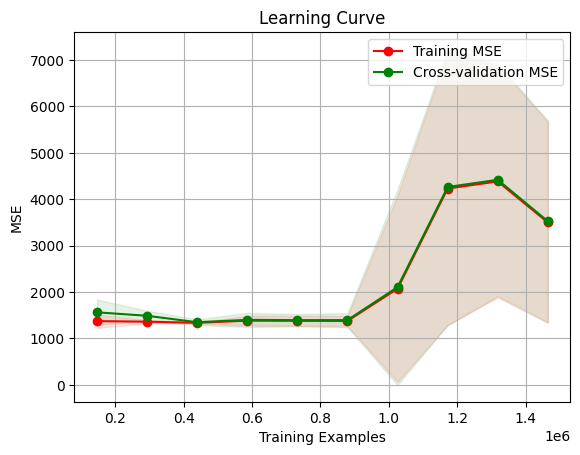

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(adaboost, X_train, Y_train, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation MSE')
plt.legend(loc='best')

plt.show()


In [35]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Lasso object
lasso = Lasso()

# Create an AdaBoostRegressor object with Lasso as the base estimator
adaboost = AdaBoostRegressor(base_estimator=lasso)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = adaboost.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.190e+10, tolerance: 5.661e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+11, tolerance: 5.520e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objecti

Mean squared error: 1480.9779072221145
R-squared: 0.9998840409071518
